In [1]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
from   astropy.table import Table
import pubplot

In [3]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [4]:
from   vmaxer import vmaxer
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod, volcom
from   lumfn import lumfn
from   schechter import named_schechter

In [5]:
gama_zmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_zmax.fits')
gama_zmax

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
32174,587722981741691177,183.70037809,-1.05288215,19.736502,0.08332,4,G12_Y2_043_160,5,21.557545,20.126371,19.787603,19.484722,19.264608,266.27475872158834,37.12664999915889,G12,-245.24125652386456,-15.860665751468476,-4.516540592019583,0.338768,0.35475794585729775,0,3,-0.10646642580750192,-0.1224563662936968,0.06937209369424623,0.060984572243037216,0.3471555268223028,2.12,-0.080820404,-0.1766384,-17.378699995134422,-17.28288200453336,37.11520168886001,37.01938369825895,0.06349754,0.08582235568257114,0.0,-7.7365017,0.002394387322182377,0.0
144355,587724650867524042,179.66102327,-1.40728884,19.757875,0.25293,4,G12_Y2_044_206,5,21.755758,20.432243,19.696829,19.460794,19.193336,902.3148855942798,39.77679061016829,G12,-719.9340667453704,4.25936683630219,-17.686760009292964,0.7354145,0.44013276051430233,0,3,-0.09365587645106356,0.201625868039517,0.09549166349861014,0.41068063584072967,0.4202255326627633,2.12,-0.24534209,-0.53621155,-19.86906474043612,-19.57819528092627,39.626940182941006,39.336070723431156,0.042123795,0.25840545857317754,0.0,-7.7578754,0.006874951846856747,0.0
124541,587724649256976626,179.89751219,-2.57730755,18.748053,0.15081,4,G12_Y5_027_201,6,21.232367,19.656624,18.665045,18.255375,17.882515,505.0130530866764,38.51651301742749,G12,-438.3880940653836,0.784167420215807,-19.73313642858396,0.99157906,0.8658975198450761,0,6,-0.04232290285814033,0.08335863308291636,0.18535825331634592,0.4453724584118625,0.7315648506906163,0.8,-0.14628571,-0.120648004,-19.807532960978975,-19.83317066958331,38.55558555802487,38.58122326662921,1.0519466,0.2295906335782965,0.0,-6.7480526,0.007698888379481501,0.0
118797,587724648722006137,184.17555062,-2.99648752,18.028751,0.11158,4,G12_Y6_043_164,6,20.562859,18.805058,17.933498,17.555489,17.241117,363.8204262003115,37.804435391408795,G12,-325.9851692787255,-23.79900353827768,-17.10953455603715,0.87155914,0.846260624586955,0,5,-0.08973139552262453,-0.06443287704317324,0.138306210819992,0.2904407874267772,0.719424566459621,0.8,-0.1082326,-0.089264,-19.805757626460696,-19.82472623096576,37.83450899975171,37.853477604256774,1.7712479,0.22928748445538527,0.0,-6.0287514,0.007668184907096908,0.0
39636,587722982275940549,177.66111022,-0.65931048,19.175905,0.14049,4,G12_Y2_019_297,6,22.140453,20.212257,19.111605,18.726572,18.40837,467.2312176782153,38.34765926055226,G12,-409.30744566436306,16.7177603718603,-4.714092626245793,1.1006527,0.9885261358871473,0,6,-0.046882715559202016,0.06524384325579918,0.18560653482909367,0.46074934236301524,0.8255098871682269,0.8,-0.1362753,-0.112392,-19.221085261376192,-19.24496856686621,38.39699048903732,38.42087379452734,0.624094,0.18038699378072803,0.0,-7.175905,0.005884411198319031,0.0
341716,587726032799858903,212.96405368,2.36821727,18.925417,0.25699,4,G15_Y6_105_385,6,21.217352,20.138872,18.947233,18.411552,18.151215,918.9550785270128,39.8164714109857,G15,-612.8576499598569,-397.4479849236432,30.20909526144918,1.191639,0.7982611128344725,0,5,0.06372051945530774,0.4570983531540385,0.2926294159794649,0.7945189411289031,0.6897494213837649,0.8,-0.24928029,-0.20559199,-20.934403591738533,-20.978091889010262,39.85

In [6]:
gama_vmax = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_vmax.fits')
gama_vmax

ZGAMA,ZMIN,ZMAX,MCOLOR_0P0,VMAX,VZ
,,,mag,,
float32,float64,float64,float64,float64,float64
0.08332,0.03903000056743622,0.08582235568257114,-17.28288200453336,267528.2071202171,242775.6461894515
0.25293,0.03903000056743622,0.25840545857317754,-19.57819528092627,7224854.989407693,6797895.7741051605
0.15081,0.03903000056743622,0.2295906335782965,-19.83317066958331,5155266.214126108,1515919.092711623
0.11158,0.03903000056743622,0.22928748445538527,-19.82472623096576,5135772.103434861,612198.9929706616
0.14049,0.03903000056743622,0.18038699378072803,-19.24496856686621,2566006.5497457627,1228052.4958238814
0.25699,0.03903000056743622,0.26298999786376953,-20.978091889010262,7594841.612883208,7112931.02371151
0.1138,0.03903000056743622,0.20768621673763388,-19.15170954475067,3863093.1522298027,650298.1043759851
0.13387,0.03903000056743622,0.26298999786376953,-20.33575346103273,7594841.612883208,1063093.454039089


Text(0.5, 0, 'ZMAX')

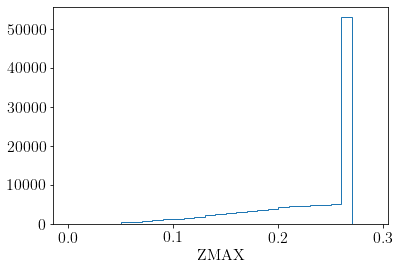

In [7]:
_ = pl.hist(gama_vmax['ZMAX'], bins=np.arange(0.0, 0.3, 0.01), histtype='step')
pl.xlabel('ZMAX')

In [8]:
np.unique(gama_vmax['ZMIN'].data)

array([0.03903   , 0.03981007])

Text(0, 0.5, '$z_{\\rm max}$')

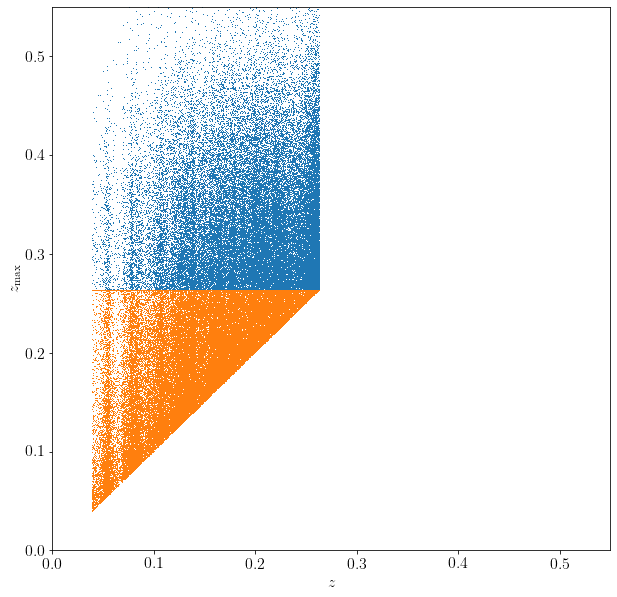

In [9]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

ax.plot(gama_zmax['ZGAMA'], gama_zmax['ZMAX'], marker=',', lw=0.0)
ax.plot(gama_vmax['ZGAMA'], gama_vmax['ZMAX'], marker=',', lw=0.0)
'''
ax.axvline(zmin, c='k', lw=0.5) 
ax.axvline(zmax, c='k', lw=0.5) 

ax.axhline(zmin, c='k', lw=0.5) 
ax.axhline(zmax, c='k', lw=0.5) 
'''
ax.set_xlim(0.0, 0.55)
ax.set_ylim(0.0, 0.55)

ax.set_xlabel(r'$z$')
ax.set_ylabel(r'$z_{\rm max}$')

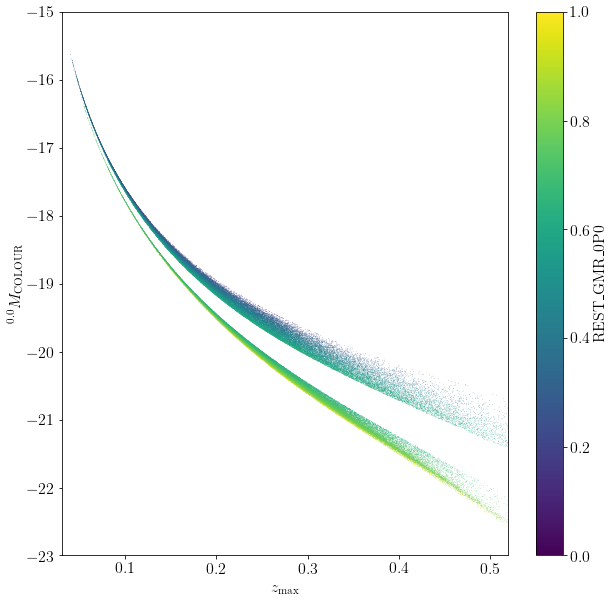

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sc=ax.scatter(gama_zmax['ZMAX'], gama_zmax['MCOLOR_0P0'], marker='.', lw=0.0, s=1, c=gama_zmax['REST_GMR_0P0'], vmin=0.0, vmax=1.0)
# ax.plot(gama_vmax['ZMAX'], gama_vmax['MCOLOR_0P0'], marker=',', lw=0.0)

ax.set_xlim(0.03, 0.52)
ax.set_ylim(-23., -15.)

ax.set_xlabel(r'$z_{\rm max}$')
ax.set_ylabel(r'$^{0.0}M_{\rm COLOUR}$', fontsize=16)

plt.colorbar(sc, label='REST_GMR_0P0')

Text(0, 0.5, 'DEC')

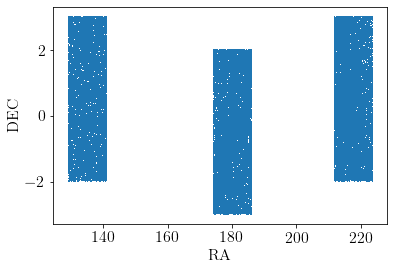

In [11]:
pl.plot(gama_zmax['RA'], gama_zmax['DEC'], marker=',', lw=0.0)

pl.xlabel('RA')
pl.ylabel('DEC')

In [12]:
gama_lf = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_lumfn.fits')
gama_lf

MEDIAN_M,PHI_N,PHI_N_ERROR,PHI_IVMAX,PHI_IVMAX_ERROR,N,V_ON_VMAX
float64,float64,float64,float64,float64,float64,float64
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--
--,0.0,0.0,0.0,0.0,0.0,--


/tmp/ipykernel_112487/1547313978.py:6: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='No weights', alpha=0.4)
/tmp/ipykernel_112487/1547313978.py:7: RuntimeWarning: divide by zero encountered in log10
  pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX')


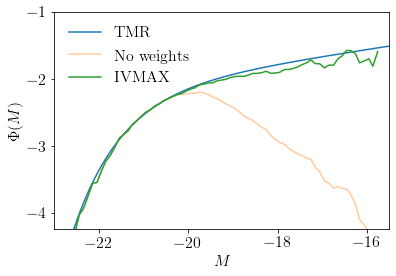

In [13]:
Ms = np.arange(-23., -15., 0.01)
sc = named_schechter(Ms, named_type='TMR')

pl.plot(Ms, np.log10(sc), label='TMR')

pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_N']), label='No weights', alpha=0.4)
pl.plot(gama_lf['MEDIAN_M'], np.log10(gama_lf['PHI_IVMAX']), label='IVMAX')

pl.xlabel(r'$M$')
pl.ylabel(r'$\Phi(M)$')

pl.ylim(-4.25, -1.)
pl.xlim(-23., -15.5)

pl.legend(frameon=False, loc=2)

Text(0.5, 0, 'V/VMAX')

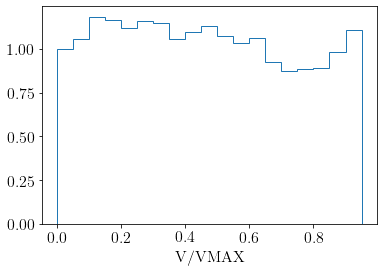

In [14]:
_ = pl.hist(gama_vmax['VZ'] / gama_vmax['VMAX'], bins=np.arange(0.0, 1.0, 0.05), histtype='step', density=True)
pl.xlabel('V/VMAX')

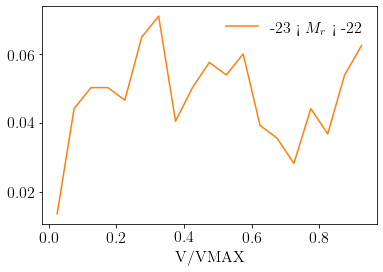

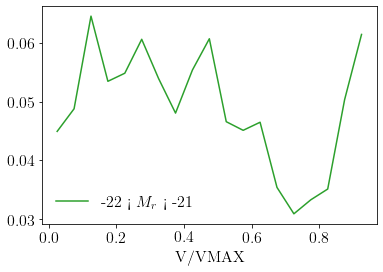

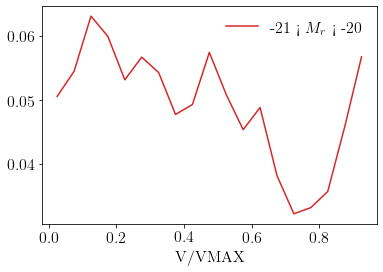

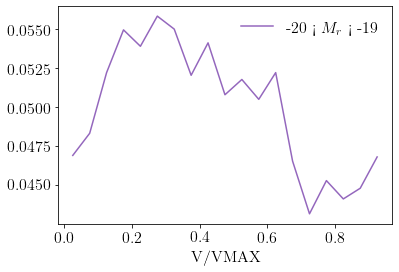

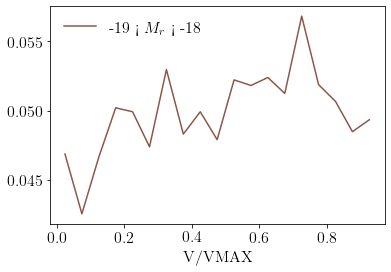

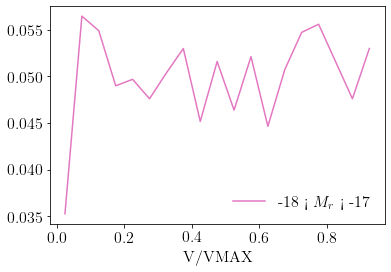

In [15]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
idx    = np.digitize(gama_vmax['MCOLOR_0P0'], np.arange(-23., -17., 1.))

for count, jj in enumerate(np.unique(idx)):
    sample = gama_vmax[(idx == jj) & (gama_vmax['MCOLOR_0P0'].data >= -23.) & (gama_vmax['MCOLOR_0P0'].data <= -17.)]
    nsample = len(sample)

    if nsample == 0:
        continue
    
    dbin = 0.05
    bins = np.arange(0., 1.0, dbin)
    
    ns, _ = np.histogram(sample['VZ'] / sample['VMAX'], bins=bins)
    
    centres = bins[:-1] + dbin/2.
    
    plt.plot(centres, ns / nsample, color=colors[count], label=r'{:.0f} < $M_r$ < {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                 sample['MCOLOR_0P0'].max()))

    plt.xlabel('V/VMAX')
    plt.legend(frameon=False)
    
    pl.show()

In [16]:
spurious = gama_zmax[gama_zmax['ZMAX_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64
185322,587725041702469675,179.83440251,-1.64817036,14.160493,0.08135,5,372775163474765824,6,17.064615,15.692654,14.905519,14.343366,14.213043,259.6079029836754,37.07158954561004,G12,-239.97727236461046,0.6935893874232879,-6.905119636685518,0.7871351,0.8222150124783408,0,5,-0.12544319185352298,-0.160523080125354,0.10303089196510218,0.18560737233721386,0.7045586438344313,0.8,-0.0789095,-0.06508,-22.935218039108076,-22.949047538591184,37.09571093614177,37.10954043562488,5.6395063,-99.0,2.0,-2.160493,0.03154120966707457,0.0
178839,587725041166581794,182.1835035,-2.07231294,14.328211,0.10734,4,G12_Y6_041_249,6,24.575645,17.823496,16.785114,15.850774,18.088587,348.95950671254064,37.71387517159247,G12,-314.6983622428863,-11.998751500068654,-11.395465440223349,1.0383816,1.0190980480456595,0,6,-0.09298329526027885,-0.07369976676785223,0.14283969236353414,0.32678700770193425,0.8544342611996858,0.8,-0.1041198,-0.085872,-23.424384233236342,-23.442632031321555,37.75259506392482,37.770842862010035,5.4717884,-99.0,2.0,-2.3282108,0.039334234229219986,0.0
125489,587724649258876969,184.17810296,-2.69967347,14.425353,0.25162,4,G12_Y4_203_103,6,15.559951,15.755173,14.309496,28.205227,16.762774,896.9591792306916,39.76386339337955,G12,-713.9407537359408,-52.154217318169536,-33.75421886554996,1.4456768,0.9922763000644923,0,6,0.11573660675273972,0.5691371102771148,0.34863479662419555,0.9652536473961288,0.829057952816934,0.8,-0.24407141,-0.201296,-25.44307373066556,-25.48584913809907,39.868426780897494,39.911202188331,5.374646,-99.0,2.0,-2.425353,0.09538586652718395,0.0
718921,587726031728017438,217.2773885,1.28502947,14.456577,0.08647,3,NED_MRK_1383,4,14.399254,14.418312,14.378856,13.8610735,14.046887,276.9712644440074,37.212173568413235,G15,-202.7981329939006,-154.36433581903054,5.717037181843526,0.039456367,0.05020904994649686,0,1,-0.0982779198530405,-0.10903060230686158,0.06300279945333358,0.018814009181763167,0.08364515776424619,2.12,-0.0838759,-0.1833164,-22.734723164844088,-22.635282672154478,37.19130046586948,37.09185997317987,5.343422,1.1327446851177603,1.0,-2.4565773,0.027777561711799695,0.0
423776,587728879796093009,137.38205797,2.9559053,14.904024,0.14906,4,G09_Y1_FX1_283,6,16.738531,15.69086,14.949677,14.424865,14.620418,498.5745074806278,38.488650344529816,G9,-318.87403319626134,293.4040460252725,22.374975832994306,0.7411823,0.6530574215121244,0,4,-0.0658698376204572,0.022255068137926215,0.15431270736417704,0.30596734437310263,0.5895276902615822,2.12,-0.1445882,-0.31600717,-23.594350725510402,-23.42293176064758,38.49837484965591,38.32695588479309,4.895975,1.0458491090380897,1.0,-2.9040241,0.03981006674260368,0.0
402898,587728308032700482,177.930413,1.9912852,15.154907,0.07667,5,579904457131714560,6,16.842907,15.722559,15.199033,14.873966,14.68127,243.84026700789565,36.935527126086086,G12,-226.1919122509048,8.173857547878793,7.869482859272214,0.5235262,0.549579180178585,0,4,-0.1197763995197219,-0.14582938798677653,0.08788865133758171,0.10089048529106931,0.5105243577579381,2.12,-0.0743699,-0.16254039,-21.7941386509326,-21.705968159773636,36.949045877495095,36.86087538633613,4.645092,0.6363

In [17]:
spurious = gama_zmax[gama_zmax['ZMIN_WARN'] > 0.0]
spurious.sort('R_PETRO')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,,mag,,,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64


# Done.